## DRAGON REAL ESTATE- PRICE PREDICTOR

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
housing= pd.read_csv("housing data.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.00000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.166528,5.93915,0.069170,0.554695,6.284634,68.574909,3.696229,4.332016,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,22.990973,2.75991,0.253994,0.115878,0.702617,28.148850,1.999689,1.417166,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.01000,0.000000,0.385000,3.561000,2.900000,0.585700,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,3.66750,0.000000,0.449000,5.885500,45.025000,2.073700,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.001000,6.41000,0.000000,0.538000,6.208500,77.500000,3.107300,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,8.10000,0.000000,0.624000,6.623500,94.075000,5.112625,5.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,95.000000,9.90000,1.000000,0.871000,8.780000,100.000000,9.222900,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

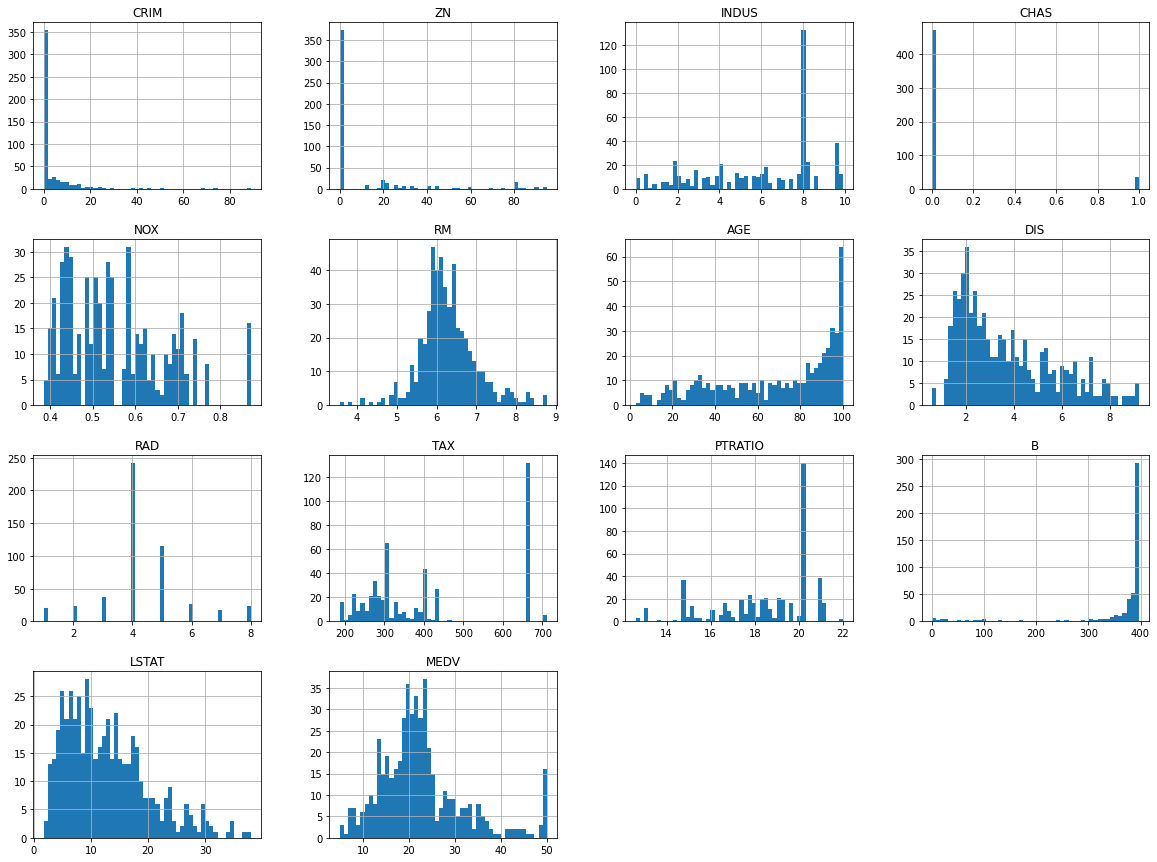

In [6]:
housing.hist(bins=50 , figsize=(20,15))

# this is the histogram of frequency

# Train-Test splitting through self written code

In [18]:
 def split_train_test(data,test_ratio):
        np.random.seed(42)    # SO THAT ALWAYS AFTER RUNNING, WE GET FIXED RANDOM VALUES
        shuffled = np.random.permutation(len(data))
        test_set_size = int((len(data)) * test_ratio)
        test_indices=shuffled[ :test_set_size]     # from 0 to test size
        train_indices=shuffled[ test_set_size: ]   # from test size till end
        return data.iloc[train_indices] , data.iloc[test_indices]
    
    
    # ALL THIS CAN BE DONE USING BUILT IN LIBRARY:-
    # from sklearn.model_selection import train_test_split
    #train_test,test_set= train_test_split( housing, test_size=0.2 , random_state=42 )

In [19]:
train_set , test_set = split_train_test(housing,0.2)
print(len(train_set)) 
print(len(test_set))

405
101


In [21]:
train_test,test_set= train_test_split( housing, test_size=0.2 , random_state=42 )
print(len(train_set)) 
print(len(test_set))

405
102


In [24]:
# But here the problem is, that for eg here, CHAS feature had 0:471 and rest as 1 ( see above )
# There ARE chances that all/most of chas=1 went to test split and caused errors
# for this, we use STRATIFIED SAMPLING


# from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit( n_splits=1 , test_size=0.2 , random_state=42 )
for train_index , test_index in split.split( housing,housing['CHAS'] ):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [25]:
strat_test_set

# DUE TO STRATIFIED SPLIT, RATIO OF CHAS IS ALMOST EQUAL IN TRAIN AND TEST SET

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.000,1.89,0,0.518,6.540,59.7,6.2669,1,422.0,15.9,389.96,8.65,16.5
379,17.86670,0.001,8.10,0,0.671,6.223,100.0,1.3861,4,666.0,20.2,393.74,21.78,10.2
223,0.61470,0.000,6.20,0,0.507,6.618,80.8,3.2721,8,307.0,17.4,396.90,7.60,30.1
219,0.11425,0.001,3.89,1,0.550,6.373,92.4,3.3633,5,276.0,16.4,393.74,10.50,23.0
48,0.25387,0.000,6.91,0,0.448,5.399,95.3,5.8700,3,233.0,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.000,3.41,0,0.489,7.007,86.3,3.4217,2,270.0,17.8,396.90,5.50,23.6
466,3.77498,0.001,8.10,0,0.655,5.952,84.7,2.8715,4,666.0,20.2,22.01,17.15,19.0
52,0.05360,21.000,5.64,0,0.439,6.511,21.1,6.8147,4,243.0,16.8,396.90,5.28,25.0
121,0.07165,0.002,5.65,0,0.581,6.004,84.1,2.1974,2,188.0,19.1,377.67,14.27,20.3


In [28]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    float64
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 12.0 KB


In [34]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

## FINDING CORRELATIONS

In [36]:
corr_matrix= housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

# tells correlation of y with other variables

MEDV       1.000000
RM         0.695360
ZN         0.357141
B          0.333461
DIS        0.264325
CHAS       0.175260
RAD        0.113519
INDUS     -0.344325
AGE       -0.376955
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

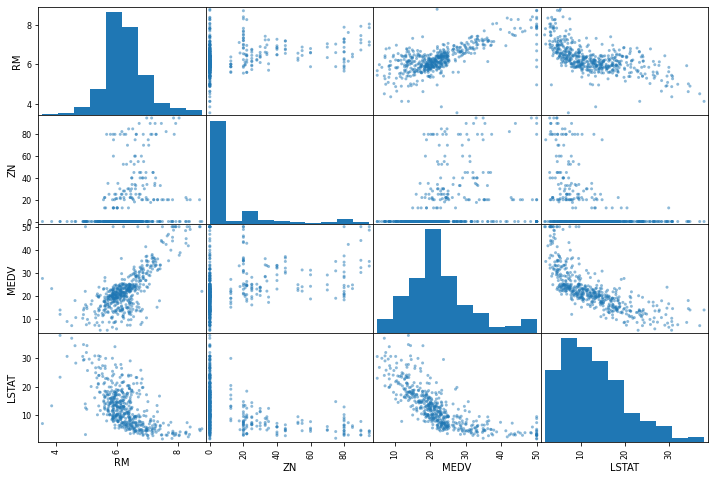

In [38]:
#from pandas.plotting import scatter_matrix

attributes = ["RM" , "ZN" , "MEDV" , "LSTAT" ]
scatter_matrix(housing[attributes] , figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

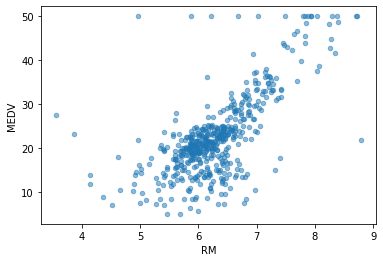

In [40]:
housing.plot(kind="scatter",x="RM" , y="MEDV" , alpha=0.5 )

## ATTRIBUTE COMBINATIONS

In [42]:
housing["TAXRM"] = housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,31.061984


In [43]:
corr_matrix= housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

# tells correlation of y with other variables

MEDV       1.000000
RM         0.695360
ZN         0.357141
B          0.333461
DIS        0.264325
CHAS       0.175260
RAD        0.113519
INDUS     -0.344325
AGE       -0.376955
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
PTRATIO   -0.507787
TAXRM     -0.537650
LSTAT     -0.737663
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

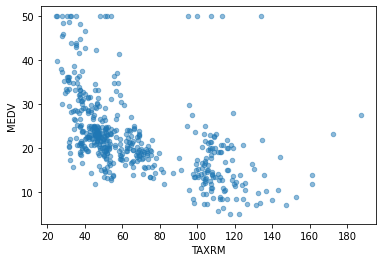

In [45]:
housing.plot(kind="scatter",x="TAXRM" , y="MEDV" , alpha=0.5 )

## MISSING ATTRIBUTES

In [46]:
# if some of the attribute is missing, then to tackle this, we can do the following:-
#  1) get rid  of missing data pt
#  2) get rid of whole attribute
#  3) set the value to some value ( mean,median,0 or any other acc to the model )

In [47]:
# for option 1:-
# a=housing.dropna(subset=["RM"])

# for option 2:-
# a=housing.drop("RM",axis=1)

# for option 3:-
# median=housing["RM"].median()
# housing["RM"].fillna(median)

In [50]:
# DOING THIS USING BUILT IN LIBRARIES:-

# from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

imputer.statistics_

array([2.56510000e-01, 1.00000000e-03, 6.41000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20850000e+00, 7.75000000e+01, 3.10730000e+00,
       4.00000000e+00, 3.30000000e+02, 1.90500000e+01, 3.91440000e+02,
       1.13600000e+01, 2.12000000e+01, 5.35914169e+01])

In [51]:
X= imputer.transform(housing)
housing_tr = pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

# now housing_tr will have empty cells filled with corresponding medians

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,506.000000,506.000000,506.00000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.166528,5.93915,0.069170,0.554695,6.284634,68.574909,3.696229,4.332016,408.237154,18.455534,356.674032,12.653063,22.532806,66.742592
std,8.601545,22.990973,2.75991,0.253994,0.115878,0.702617,28.148850,1.999689,1.417166,168.537116,2.164946,91.294864,7.141062,9.197104,31.352087
min,0.006320,0.000000,0.01000,0.000000,0.385000,3.561000,2.900000,0.585700,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.082045,0.000000,3.66750,0.000000,0.449000,5.885500,45.025000,2.073700,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,43.569765
50%,0.256510,0.001000,6.41000,0.000000,0.538000,6.208500,77.500000,3.107300,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000,53.591417
75%,3.677082,12.500000,8.10000,0.000000,0.624000,6.623500,94.075000,5.112625,5.000000,666.000000,20.200000,396.225000,16.955000,25.000000,97.919933
max,88.976200,95.000000,9.90000,1.000000,0.871000,8.780000,100.000000,9.222900,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


     FEATURE SCALING

primarily 2 types of feature scaling is common:-
1) min-max scaling:-  (value-min)/(max-min)

    scikit learn provides MinMaxScaler for this

2) standardisation:-  (value-mean)/std_dev

   scikit learn provides Standard scaler for this

## CREATING A PIPELINE

In [56]:
#  from sklearn.pipeline import Pipeline
#  from sklearn.preprocessing import StandardScaler

my_pipeline= Pipeline([
    ( 'imputer' , SimpleImputer(strategy="median") ) , 
      ( 'std_scaler' , StandardScaler() )
])

# we can add as many features as we need here

In [61]:
# using the pipeline

housing_num_tr= my_pipeline.fit_transform(housing_tr)
housing_num_tr

array([[-0.41978194,  0.29751828, -1.31625379, ..., -1.0755623 ,
         0.15968566, -0.69357674],
       [-0.41733926, -0.48617247,  0.41014708, ..., -0.49243937,
        -0.10152429, -0.92761003],
       [-0.41734159, -0.48617247,  0.41014708, ..., -1.2087274 ,
         1.32424667, -1.05556065],
       ...,
       [-0.41344658, -0.48612893, -1.45407571, ..., -0.98304761,
         0.14880191, -0.8814641 ],
       [-0.40776407, -0.48612893, -1.45407571, ..., -0.86530163,
        -0.0579893 , -0.84799337],
       [-0.41500016, -0.48612893, -1.45407571, ..., -0.66905833,
        -1.15724782, -0.68544738]])

In [63]:
housing_num_tr.shape

(506, 15)

## selecting desired model

LINEAR REGRESSION

In [65]:
housing= strat_train_set.drop("MEDV" , axis=1)     # X
housing_labels= strat_train_set["MEDV"].copy()     # Y


In [67]:
# from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit( housing , housing_labels )

LinearRegression()

In [70]:
some_data = housing.iloc[:20]
some_labels= housing_labels.iloc[:20]


In [73]:
predictions=model.predict(some_data)

In [77]:
mse= mean_squared_error(housing_labels[:20],predictions)
mse

rmse= np.sqrt(mse)
rmse

2.983467737771955

DECISION TREE REGRESSOR

In [80]:
model=DecisionTreeRegressor()
model.fit( housing , housing_labels )

DecisionTreeRegressor()

In [81]:
some_data = housing.iloc[:20]
some_labels= housing_labels.iloc[:20]


In [82]:
predictions=model.predict(some_data)

In [83]:
mse= mean_squared_error(housing_labels[:20],predictions)
mse

rmse= np.sqrt(mse)
rmse

0.0

👆 (OVERFITTING)

RANDOM FOREST REGRESSOR

In [88]:
model=RandomForestRegressor()
model.fit( housing , housing_labels )

RandomForestRegressor()

In [89]:
some_data = housing.iloc[:20]
some_labels= housing_labels.iloc[:20]


In [90]:
predictions=model.predict(some_data)

In [91]:
mse= mean_squared_error(housing_labels[:20],predictions)
mse

rmse= np.sqrt(mse)
rmse

0.8776612957172031